In [280]:
#-*- coding:utf-8 -*-
import jieba
import sys
import os
import pandas as pd
from string import digits
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

### 建立function --> fileinpath()
### 使用glob模組將路徑./files資料夾內所有的文本txt檔名稱讀進來
### 將這些txt檔名稱儲存到textfile這個list

In [281]:
import os
import glob
def textfile():
    files = glob.glob("./files/*.txt")
    return files
textfile=textfile()
textfile

['./files\\2016營運概況.txt',
 './files\\2016股東營業報告書.txt',
 './files\\2016財務狀況與績效.txt',
 './files\\2017 股東營業報告書.txt',
 './files\\2017營運概況.txt',
 './files\\2017財務狀況與績效.txt']

### 自定義jieba字典，存檔到dict.txt

In [282]:
dictlist = ['大同股份有限公司','公允價值','財務報表','馬達','林前董事','營運部門','市場績效','財務績效','績效之檢討','管理系統','併入','合併','合併報表']
d = open('dict.txt','w+',encoding='utf8')
for i in dictlist:
    d.write(i+'\n')
d.close()
jieba.load_userdict('dict.txt')

### 定義停止詞與要剔除的特殊符號

In [283]:
stopwords = ['我', '對','主因','事項','分析','因應','未來','提供','持續','已經','全力','將持續','進行','努力','可能','我們','已有','重要','各位','概況','主要','採用', '如下','個體','所致','齊全','齊心','龐大','齊下','億元','10', '五年', '相關','六年','部分','企業','之','於','註','係','民國','至','105.12','千元','資產','三十一日','期','負債','年','價值','按','7','12','有','年報','十二月','106.12','本集團','期間','計','所','集團','人','其','合','併','報導','等','已','時','100.00%','新','明','續','該','日','6','外','報告','股','財務','除','附','附錄','予','者','第','另','年度','本','○','臺','31','一','幣','後','大同','及','與','公司','單位','報表','公','司','為','月','有限公司','106','以','1','或','其他','金額','臺幣','1','2','3','4','5','000','認列','衡量','\n']
puncs = '！？｡/＂＃＄$％＆＇()（）( , )＊＋，_－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》.%「」『』【】 〔〕〖〗〘〙〚〛-〜,〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

### 將textfile(list)內的文本讀取進來
### 使用jieba斷詞並加入corpus(list)之中
### 一個文本就是一個string，斷詞用空白隔開

In [284]:
# Take each line in target_txt as an unique document
# Cut each line for trarget_txt, and collect it in corpus.

corpus = []
jieba.load_userdict('dict.txt')
for t in textfile:
    f = open(t,'r', encoding ="utf-8")
    r = f.read()
    remove_digits = str.maketrans('', '', digits)
    r = r.translate(remove_digits)
    r_list = jieba.cut(r, cut_all=False)
    r_list = list(r_list)
    for w in r_list:
        if (w in stopwords) or (w in puncs) or (w < '\u4e00') or (w > '\u9fff'):
            r_list.remove(w)        
    st=" ".join(r_list)
    corpus.append(st)
corpus

['營運 管理 目的 依據 不同 產品 勞務劃 分營運 並分 下列 三個 應 營運 部門 光電部門 該部門 負責 大 尺寸 面板 中小 尺寸 面板 如 智慧型 手機 平板 電腦 車載 面板 以及 觸控 面板 開發 製 造 銷售 機電 能源 事業 部門 該部門 負責 智慧 電網 智慧 電表 太陽 光電 照明 馬達 機電及 能源 管理系統 開發 製 造 銷 售 消費產品 部門 該部門 負責 數位 電視 平面 顯示器 數位 媒體 設備 數位 影音 及家 電產品 開發 製 造 銷 售 營運部門 並未 彙 總以 組成 前述 之應 營運部門 未 經營 活動 營運部門 資訊 合併 揭露 部門 項下 五 光電事業 部 門 機電 能源 事業 部 門 消費產品 部 門 事業 部 門 合計 收入 總 營業 比重 類別 營業 比重 電力 事業 群 消費 事業 群 系統 事業 群 營運 電力 事業 群 電力 設備 事業部 重電 變壓器 配電盤 業務 內容 業務範圍 內容 營業 比重 類別 營業 比重 變壓 器類 開關類 二 目前 商品 項目 變壓 器類 各式 電力 變壓器 配電變 壓器 電抗器 變壓器 放電 診斷 設備 及委 託 試驗 開關類 配電盤 控制 盤 GIS 氣體 絕緣 開關 地下 二路 四路 開關 配電 器材 電 容器 比壓器 比流器 二 技術 研發 產品 開發 產 品 別產品 規格 預計 上市 時間 變壓 器類 亭 置式 變壓器 變壓器 MVA TR 短路 試驗 智慧型 變壓器 開關類 地下 四路 自動線 路 開關 智慧型 配電箱 二 產品 研發 方向 取得 電力 變壓器 短路 試驗 資格及 級 超高 電壓 超 大容量 變壓器 開發 太陽能 發電系 統用 高效率 變壓器 智 慧型 配電箱 智慧型 變壓器 三 產業 產業 現況 發展 電力 設備業 的 景氣 衰退 狀況 受限 國內 外景 氣 不如 預期 台電 民間 投資放緩 原 物料 如銅 的 價格 下跌 也 帶動產品 價格 下跌 依據 台 經院 全年 的 電力 設 備 製 造 業 的 生 產 值 銷 售 值 皆 較 去年 下 滑 展望 根據 行政院 主計處 統計 經濟成 長 率 預估 高 受惠 台電 宣示 年將 投入 發展 再生能源 可望 將 逐步提高 產業 的 生產動 能 二 產業 上 中 下游 之關 聯性 上 游 零件 絕緣

### 訓練tfidf模型
### 將詞頻向量矩陣存到變數tfidf
### 將文字列表存到變數words

In [285]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  4328


In [286]:
print("tfidf.shape: ", tfidf.shape)
tfidf

tfidf.shape:  (6, 4328)


<6x4328 sparse matrix of type '<class 'numpy.float64'>'
	with 8046 stored elements in Compressed Sparse Row format>

### 將tfidf矩陣中>0.05的詞顯示出來

In [287]:
# check each document
for i in range(len(corpus)):
    print('----Document {0}----'.format(i))
    for j in range(len(words)):
        if tfidf[i,j] > 0.05:
            print(words[j], tfidf[i,j], i ,j)                

----Document 0----
不利因素 0.052909801027040126 0 216
主要 0.06921750694563808 0 312
使用 0.05211510458190541 0 546
供應 0.05583761205204151 0 555
內容 0.07495555145497351 0 715
公共 0.051038497280541384 0 756
包線 0.10141045196849356 0 933
合作 0.07445014940272202 0 1163
品質 0.05211510458190541 0 1210
大同 0.08612746416091359 0 1416
太陽能 0.1212164310412858 0 1445
安全 0.13028776145476353 0 1489
客戶 0.05967026460830869 0 1511
家庭 0.0633589983460997 0 1522
專利 0.08377385162614687 0 1597
工程 0.05741830944060906 0 1679
市場 0.11695371863228503 0 1700
年報 0.06698802768071056 0 1733
建築 0.05956011952217761 0 1784
建置 0.054228403360575224 0 1790
微電網 0.06700513446244981 0 1840
應用 0.06698802768071056 0 1889
成長 0.07336783984077824 0 1904
技術 0.08353837045163216 0 1944
授權 0.09259215179732022 0 1989
控制 0.054228403360575224 0 2010
提供 0.05741830944060906 0 2030
提升 0.10845680672115045 0 2034
整合 0.07399112811430276 0 2132
數位 0.07495555145497351 0 2144
日本 0.06698802768071056 0 2208
智慧 0.2601623536922259 0 2238
智能 0.05509478117052149 

開發 0.07716547585129671 3 3997
陸續 0.05893115205767012 3 4038
電廠 0.07366394007208765 3 4110
馬達 0.07366394007208765 3 4271
體營 0.0610918364725118 3 4277
高階多 0.0610918364725118 3 4313
----Document 4----
主要 0.06987245360359853 4 312
使用 0.05260822568784159 4 546
供應 0.06388141690666478 4 555
光纜 0.057861311811900434 4 697
內容 0.08456653264816216 4 715
公司 0.0674630586517503 4 757
包線 0.10237001320566998 4 933
台幣 0.05341044167252348 4 1120
合作 0.07891233853176238 4 1163
商機 0.05474152082340777 4 1226
大同 0.06118169974380869 4 1416
太陽能 0.0676218786642096 4 1445
安全 0.14279375543842718 4 1489
客戶 0.05541608389250918 4 1511
對策 0.05341044167252348 4 1624
工程 0.06440178920400914 4 1679
市場 0.1517918819664382 4 1700
年度 0.0674630586517503 4 1738
建置 0.07084196812441006 4 1790
應用 0.08372232596521188 4 1889
成長 0.06440178920400914 4 1904
技術 0.09396640312208078 4 1944
提升 0.10948304164681553 4 2034
整合 0.08191942836283965 4 2132
數位 0.10682088334504695 4 2144
日本 0.07728214704481097 4 2208
智慧 0.19516099109970625 4 2238
智

In [288]:
tfarray=tfidf.toarray()

In [289]:
tfarray

array([[0.00440915, 0.        , 0.        , ..., 0.        , 0.00318991,
        0.00440915],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01438512,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02483365, ..., 0.02483365, 0.01473279,
        0.        ],
       [0.00445087, 0.0054278 , 0.        , ..., 0.        , 0.00322009,
        0.00445087],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [290]:
tfarray.shape

(6, 4328)

In [291]:
tfarray[0]

array([0.00440915, 0.        , 0.        , ..., 0.        , 0.00318991,
       0.00440915])

### 使用CountVectorizer()方法
### 統計corpus之中個別文本的文字次數
### 用pandas套件將結果整理為DataFrame格式
### column-->words是所有出現的文字
### 右邊每一個column都是一個文本的文字出現次數統計

In [292]:
vec = CountVectorizer()
X = vec.fit_transform(corpus)
df = pd.DataFrame(vec.get_feature_names(),columns=['words'])
for i in range(X.shape[0]):
    docnumber='doc'+str(i+1)+'_count'
    df[docnumber] = pd.DataFrame(X.toarray()[i].T)
df

,words,doc1_count,doc2_count,doc3_count,doc4_count,doc5_count,doc6_count
0,abb,1,0,0,0,1,0
1,ac,0,0,0,0,1,0
2,ai,0,0,0,1,0,0
3,ami,1,0,0,0,2,0
4,analog,1,0,0,0,1,0
5,and,1,0,0,0,0,0
6,ansi,1,0,0,0,0,0
7,apec,2,0,0,0,0,0
8,api,0,0,0,0,1,0
9,apigba,0,0,0,0,1,0


In [293]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff') or (w in stopwords) or (w in puncs) :
        return 0
    else:
        return 1
df=df[df['words'].apply(chinese) !=0]
df

,words,doc1_count,doc2_count,doc3_count,doc4_count,doc5_count,doc6_count
158,一個,2,0,0,1,3,0
159,一切正常,0,0,0,0,0,1
160,一千,0,0,1,0,0,1
161,一同,1,0,0,0,1,0
162,一向,0,1,1,0,0,1
163,一定,0,0,0,2,0,0
164,一年,0,2,2,1,0,2
165,一日,0,0,0,0,0,1
166,一束,1,0,0,0,1,0
167,一案,0,0,0,0,1,0


In [294]:
writer = pd.ExcelWriter('wordscount.xlsx')
df.to_excel(writer,'wordscount_1')
writer.save()

In [295]:
test=['智慧','虧損']
print(vectorizer.transform(test).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


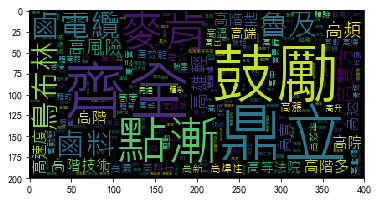

In [296]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

allcount=vec.vocabulary_

font = r"C:/Users/USER/Desktop/three/msjh.ttc"
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(allcount)
plt.imshow(wordcloud)

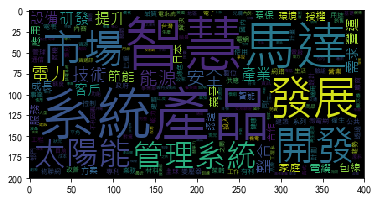

In [297]:
tfidf_dict1=dict(zip(df.words, df.doc1_count))
tfidf_dict1
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(tfidf_dict1)
plt.imshow(wordcloud)

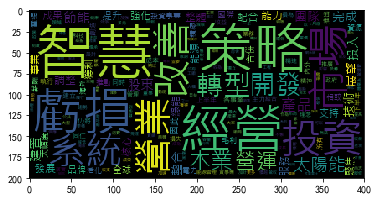

In [298]:
tfidf_dict2=dict(zip(df.words, df.doc2_count))
tfidf_dict2
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(tfidf_dict2)
plt.imshow(wordcloud)

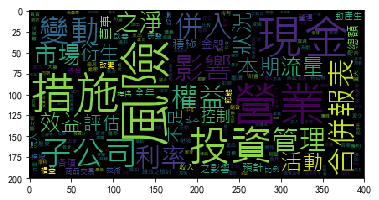

In [299]:
tfidf_dict3=dict(zip(df.words, df.doc3_count))
tfidf_dict3
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(tfidf_dict3)
plt.imshow(wordcloud)

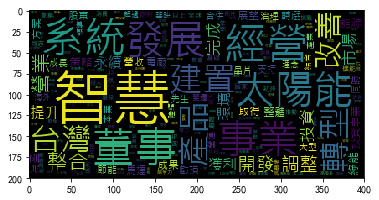

In [300]:
tfidf_dict4=dict(zip(df.words, df.doc4_count))
tfidf_dict4
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(tfidf_dict4)
plt.imshow(wordcloud)

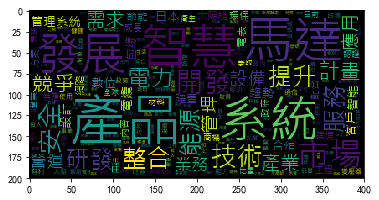

In [301]:
tfidf_dict5=dict(zip(df.words, df.doc5_count))
tfidf_dict5
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(tfidf_dict5)
plt.imshow(wordcloud)

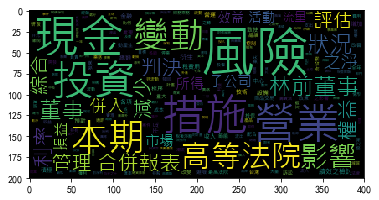

In [302]:
tfidf_dict6=dict(zip(df.words, df.doc6_count))
tfidf_dict6
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(tfidf_dict6)
plt.imshow(wordcloud)